In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
di = np.random.uniform(0,5, 20)

In [3]:
def signal_model(x, a, b):
    return a*np.exp(b*x)

In [4]:
def c0_k(mu, x, k):
    return (((((k*x)-mu)**k)*np.exp(-k*x))/(np.math.factorial(k)))*(1+(k/(mu-(k*x))))

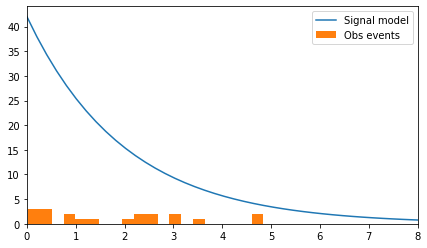

In [5]:
c1, c2 = 42, -0.5
plt.figure(figsize=(7,4))
x = np.linspace(0, 20, 100)
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
value, bins, _ = plt.hist(di, bins = 20, label = 'Obs events')
binscenter=(bins[:-1]+bins[1:])*0.5
plt.xlim(0,8); plt.legend()
plt.show()

In [6]:
i, maxgaps = 0, []
for b in range(20):
    if i < 20 and value[i] ==0:
        for n in range(5):
            if value[i+n] !=0: 
                gaparea = np.trapz([signal_model(bins[i], c1, c2 ), signal_model(bins[i+n], c1, c2 )], [bins[i], bins[i+n]])
                maxgaps.append((i, i+n , gaparea))
                i+=n; 
                break
    else:
        i+=1
maxgaps.append((bins[-1], 8, np.trapz([signal_model(bins[-1], c1, c2 ), signal_model(8, c1, c2 )], [bins[-1], 8])))
maxarray = np.asarray(maxgaps)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
print('maximum area ', maxvalues[2], 'is between', bins[int(maxvalues[0])], 'and', bins[int(maxvalues[1])])

maximum area  8.650642900397314 is between 1.4712776063196658 and 1.9525618218080534


In [7]:
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(bins[b], c1, c2 ), signal_model(bins[b+1],c1, c2 )], [bins[b], bins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])

mu is 75.47852261632828
m is  8.725192275924561


In [8]:
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print(c0)

0.9881826534259414


### Finding optimum signal model / sigma and $C_0$

For constant c1 30.0  c2  -0.5
C0 is 0.902817725931876
expected events / area under blue curve:  53.91323044023449


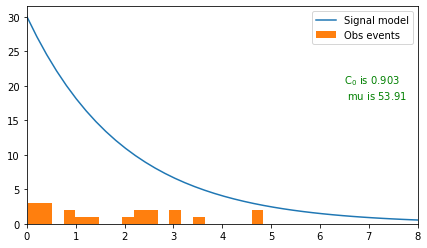

-------------------------------------
For constant c1 35.0  c2  -0.5918367346938771
C0 is 0.9008276226578589
expected events / area under blue curve:  54.907376602305966


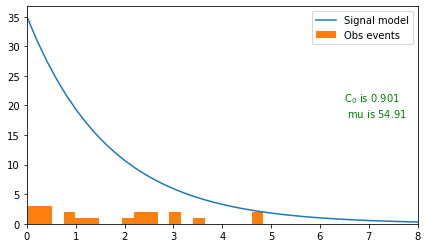

-------------------------------------
For constant c1 40.0  c2  -0.6836734693877551
C0 is 0.909625825641302
expected events / area under blue curve:  55.40706325607327


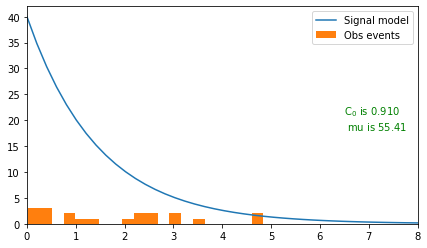

-------------------------------------
For constant c1 41.0  c2  -0.7755102040816322
C0 is 0.900093654860608
expected events / area under blue curve:  50.663616341867005


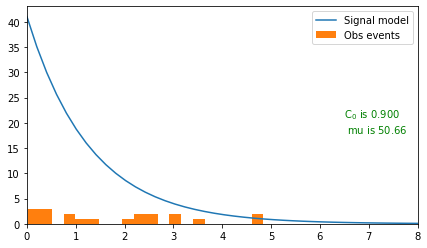

-------------------------------------
For constant c1 43.0  c2  -0.8673469387755102
C0 is 0.9007825737882275
expected events / area under blue curve:  47.83925813332483


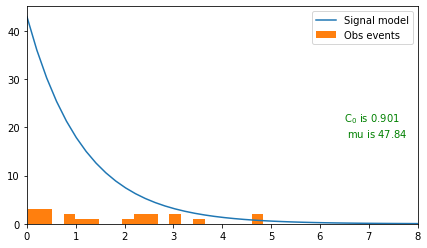

-------------------------------------
For constant c1 46.0  c2  -0.9591836734693873
C0 is 0.9098882833637854
expected events / area under blue curve:  46.455601316296885


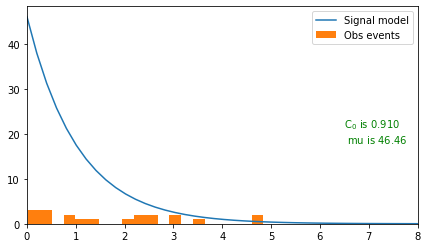

-------------------------------------
For constant c1 48.0  c2  -1.0510204081632653
C0 is 0.9069061367751325
expected events / area under blue curve:  44.32505855807422


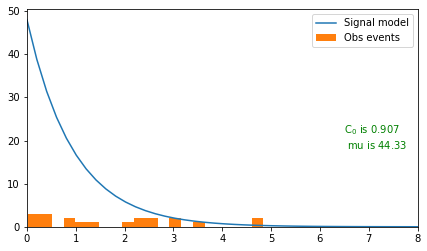

-------------------------------------
For constant c1 50.0  c2  -1.1428571428571428
C0 is 0.902535986996097
expected events / area under blue curve:  42.49262697515381


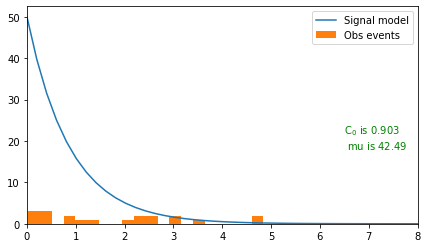

-------------------------------------


In [9]:
for c1 in np.linspace(1,50,50):
    for c2 in np.linspace(-5,-0.5,50):
        i, maxgaps = 0, []
        for b in range(20):
            if i < 20 and value[i] ==0:
                for n in range(5):
                    if value[i+n] !=0: 
                        gaparea = np.trapz([signal_model(bins[i], c1, c2 ), signal_model(bins[i+n], c1, c2 )], [bins[i], bins[i+n]])
                        maxgaps.append((i, i+n , gaparea))
                        i+=n; 
                        break
            else:
                i+=1
        maxgaps.append((bins[-1], 8, np.trapz([signal_model(bins[-1], c1, c2 ), signal_model(8, c1, c2 )], [bins[-1], 8])))
        maxarray = np.asarray(maxgaps)
        maxvalues = maxarray[:][np.argmax(maxarray[:,2])]

        mu = 0
        for b in range(20):
            mu+=np.trapz([signal_model(bins[b], c1, c2 ), signal_model(bins[b+1],c1, c2 )], [bins[b], bins[b+1]])

        c0 = 0
        for k in range(0, int(mu/maxvalues[2])+1):
            c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
        
        if c0 > 0.9 and c0 < 0.91:
            print('For constant c1', c1, ' c2 ', c2)
            print('C0 is', c0)
            print('expected events / area under blue curve: ', mu)
            plt.figure(figsize=(7,4))
            x = np.linspace(0, 20, 100)
            plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
            value, bins, _ = plt.hist(di, bins = 20, label = 'Obs events')
            plt.text(6.5,18,'$\mathregular{C_0}$ is %.3f \n $\mathregular{mu}$ is %.2f'%(c0, mu), color ='green')
            # for b in bins:
            #     plt.vlines(b, 0, 2, alpha = 0.2, color ='black')
            binscenter=(bins[:-1]+bins[1:])*0.5
            plt.xlim(0,8); plt.legend()
            plt.show()
            print('-------------------------------------')